# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Упражнения.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import numpy as np

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [149]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [5]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

In [6]:
for i, col in enumerate(data.columns):
    col_missing = np.mean(data[col].isnull())
    print(f'{col} - {round(col_missing*100)}%')
    if i>=10:
        break

Pregnancies - 0%
Glucose - 1%
BloodPressure - 5%
SkinThickness - 30%
Insulin - 49%
BMI - 1%
DiabetesPedigreeFunction - 0%
Age - 0%
Class - 0%


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [7]:
data['Glucose'] = data['Glucose'].fillna(value=data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].fillna(value=data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].fillna(value=data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].fillna(value=data['Insulin'].median())
data['BMI'] = data['BMI'].fillna(value=data['BMI'].mean())
data.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1


__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [9]:
data[(data['Age'] > 50) & (data['Class'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1
13,1,189.0,60.0,23.0,846.0,30.100000,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.800000,0.587,51,1
24,11,143.0,94.0,33.0,146.0,36.600000,0.254,51,1
39,4,111.0,72.0,47.0,207.0,37.100000,1.390,56,1
43,9,171.0,110.0,24.0,240.0,45.400000,0.721,54,1
53,8,176.0,90.0,34.0,300.0,33.700000,0.467,58,1
93,4,134.0,72.0,29.0,125.0,23.800000,0.277,60,1
115,4,146.0,92.0,29.0,125.0,31.200000,0.539,61,1


In [10]:
old_with_diabet = len(data[(data['Age'] > 50) & (data['Class'] == 1)])
print(old_with_diabet)

38


__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [11]:
data.sort_values(by='Pregnancies', ascending=False)[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [12]:
# не конкретна формулировка "между 30 и 40". Буду считать, что границы этого диапазона не включаются в выборку
data[(data['Age'] > 30) & (data['Age'] < 40) & (data['Pregnancies'] >= 3)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
11,10,168.0,74.0,29.0,125.0,38.0,0.537,34,1
15,7,100.0,72.0,29.0,125.0,30.0,0.484,32,1
17,7,107.0,74.0,29.0,125.0,29.6,0.254,31,1
29,5,117.0,92.0,29.0,125.0,34.1,0.337,38,0
...,...,...,...,...,...,...,...,...,...
730,3,130.0,78.0,23.0,79.0,28.4,0.323,34,1
744,13,153.0,88.0,37.0,140.0,40.6,1.174,39,0
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1
756,7,137.0,90.0,41.0,125.0,32.0,0.391,39,0


In [13]:
middle_age_and_fertille = len(data[(data['Age'] > 30) & (data['Age'] < 40) & (data['Pregnancies'] >= 3)])
print(middle_age_and_fertille)

115


__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [14]:
len(data['BloodPressure'])

768

In [15]:
data[(data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
12,10,139.0,80.0,29.0,125.0,27.1,1.441,57,0
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
21,8,99.0,84.0,29.0,125.0,35.4,0.388,50,0
23,9,119.0,80.0,35.0,125.0,29.0,0.263,29,1
...,...,...,...,...,...,...,...,...,...
740,11,120.0,80.0,37.0,150.0,42.3,0.785,48,1
744,13,153.0,88.0,37.0,140.0,40.6,1.174,39,0
745,12,100.0,84.0,33.0,105.0,30.0,0.488,46,0
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


In [16]:
normal_pressure = len(data[(data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)]) / len(data['BloodPressure'])
print(f'{round(normal_pressure*100, 2)}%')

18.88%


__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [17]:
data[(data['BloodPressure'] >= 90) & (data['BMI'] >= 30)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1
10,4,110.0,92.0,29.0,125.0,37.600000,0.191,30,0
22,7,196.0,90.0,29.0,125.0,39.800000,0.451,41,1
24,11,143.0,94.0,33.0,146.0,36.600000,0.254,51,1
29,5,117.0,92.0,29.0,125.0,34.100000,0.337,38,0
43,9,171.0,110.0,24.0,240.0,45.400000,0.721,54,1
53,8,176.0,90.0,34.0,300.0,33.700000,0.467,58,1
67,2,109.0,92.0,29.0,125.0,42.700000,0.845,54,0
72,13,126.0,90.0,29.0,125.0,43.400000,0.583,42,1
84,5,137.0,108.0,29.0,125.0,48.800000,0.227,37,1


In [18]:
len(data[(data['BloodPressure'] >= 90) & (data['BMI'] >= 30)])

45

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [19]:
data.Glucose[data['Class'] == 1].mean()

142.13059701492537

In [20]:
data.Glucose[data['Class'] == 0].mean()

110.682

Глюкоза в среднем выше у диабетчиков

In [21]:
data.BloodPressure[data['Class'] == 1].mean()

75.1231343283582

In [22]:
data.BloodPressure[data['Class'] == 0].mean()

70.92

У диабетчиков выше давление

In [23]:
data.Insulin[data['Class'] == 1].mean()

164.70149253731344

In [24]:
data.Insulin[data['Class'] == 0].mean()

127.792

Ну и инсулин у них тоже зашкаливает

__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

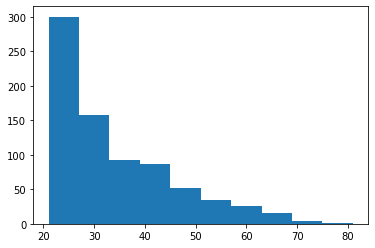

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <BarContainer object of 10 artists>)

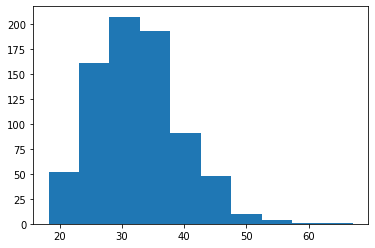

In [95]:
# Строим гистограмму по возрасту и по индексу массы тела
plt.hist(data.Age, bins=10)
plt.show()
plt.hist(data.BMI)

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

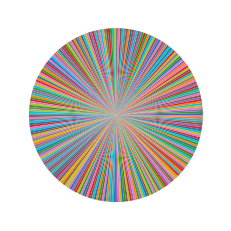

In [110]:
plt.pie(data['Class'])
plt.show()


# Вот как надо было
# sizes = [len(data[data.Class == 1]), len(data[data.Class == 0])]
# plt.pie(sizes, labels=['diabet', 'healthy'], autopct='%1.1f%%')
# plt.title('Структура здоровых и больных диабетом женщин')
# plt.show()

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

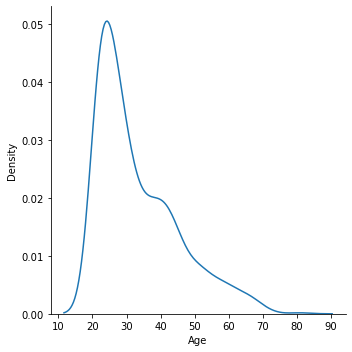

In [116]:
import seaborn as sns
sns.displot(kind="kde",
            data=data.Age)

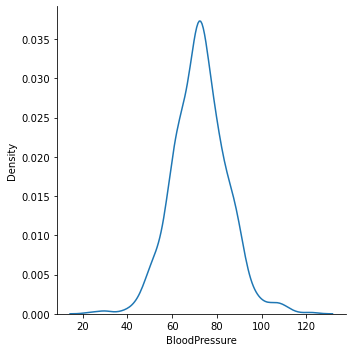

In [117]:
sns.displot(kind="kde",
            data=data.BloodPressure)

In [ ]:
Распределение по давлению похоже на нормальное, а вот с возрастом что-то не так: слом нормальности для диапазона 35-40 лет

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

<BarContainer object of 768 artists>

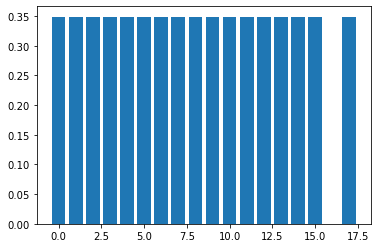

In [62]:
plt.bar(data.Pregnancies, data.Class.mean())

# [(data['Class'] == 1).mean()]
# # plt.scatter(data.Age[(data["Sex"] == 'female')], data.Fare[(data["Sex"] == 'female')], c="red")

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [25]:
data['wasPregnant'] = [1 if x > 0 else 0 for x in data['Pregnancies']]
print(data['wasPregnant'])
# print(data)

0      1
1      1
2      1
3      1
4      0
      ..
763    1
764    1
765    1
766    1
767    1
Name: wasPregnant, Length: 768, dtype: int64


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [28]:
was_pregnant_and_ill = len(data[(data['wasPregnant'] == 1) & (data['Class'] == 1)]) # больные диабетом и беременные
wasnt_pregnant_and_ill = len(data[(data['wasPregnant'] == 0) & (data['Class'] == 1)]) # больные диабетом и небеременные
all_ill = sum(data['Class'] == 1) # все больные диабетом

# print(was_pregnant_and_ill, wasnt_pregnant_and_ill, all_ill)

# процент больных диабетом среди женщин, которые были беременны
share_p_i = (was_pregnant_and_ill / all_ill) * 100
share_not_p_i = (wasnt_pregnant_and_ill / all_ill) * 100

print(f'{round(share_p_i, 2)}%, {round(share_not_p_i, 2)}%')
print('Что-то беременные болеют диабетом гораздо чаще')

85.82%, 14.18%
Что-то беременные болеют диабетом гораздо чаще


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [29]:
def weight(x):
    if x <= 18.5:
        return 'Underweight'
    elif x > 18.5 and x <= 24.9:
        return 'Normal weight'
    elif x > 24.9 and x <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

data['bodyType'] = data['BMI'].apply(weight)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Class  wasPregnant       bodyType  
0                       0.627   50     

__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [32]:
data[(data['bodyType'] == 'Normal weight') & (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
28,13,145.0,82.0,19.0,110.0,22.2,0.245,57,0,1,Normal weight
50,1,103.0,80.0,11.0,82.0,19.4,0.491,22,0,1,Normal weight
94,2,142.0,82.0,18.0,64.0,24.7,0.761,21,0,1,Normal weight
180,6,87.0,80.0,29.0,125.0,23.2,0.084,32,0,1,Normal weight
252,2,90.0,80.0,14.0,55.0,24.4,0.249,24,0,1,Normal weight
316,3,99.0,80.0,11.0,64.0,19.3,0.284,30,0,1,Normal weight
333,12,106.0,80.0,29.0,125.0,23.6,0.137,44,0,1,Normal weight
676,9,156.0,86.0,29.0,125.0,24.8,0.230,53,1,1,Normal weight
690,8,107.0,80.0,29.0,125.0,24.6,0.856,34,0,1,Normal weight
728,2,175.0,88.0,29.0,125.0,22.9,0.326,22,0,1,Normal weight


In [31]:
data[(data['bodyType'] == 'Normal weight') & (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)]
# посчитаем общее число здоровых женщин
health = len(data[(data['bodyType'] == 'Normal weight') & (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)])
print(health)

# посчитаем число здоровых женщин, больных диабетом
data[(data['bodyType'] == 'Normal weight') & ((data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)) & (data['Class'] == 1)]
health_and_ill = len(data[(data['bodyType'] == 'Normal weight') & ((data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)) & (data['Class'] == 1)])
print(health_and_ill)

# найдем удельный вес болеющих здоровых
share_health_and_ill = (health_and_ill / health) * 100
# print(health, health_and_ill)
print(f'{round(share_health_and_ill, 2)}%')

10
1
10.0%
